# Exercises from Linear Algebra for DS

## Chapter 8

In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import scipy
import pandas as pd
from latools import vec, row, frobenius_distance
from skimage import io,color
from scipy.signal import convolve2d

import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

pio.renderers.default='iframe'
#plt.figure(figsize=(12, 12), dpi=80)
plt.rcParams["figure.figsize"] = (10,10)

### Exercise 8.1

Illustrate that
$$ (A^{-1})^{-1} = A $$

In [2]:
A = np.random.randint(low=0, high=10, size=(4, 4))
A

array([[7, 3, 3, 0],
       [2, 1, 9, 7],
       [4, 8, 9, 3],
       [1, 5, 5, 4]])

In [3]:
np.linalg.inv(np.linalg.inv(A))

array([[7.00000000e+00, 3.00000000e+00, 3.00000000e+00, 2.67999196e-16],
       [2.00000000e+00, 1.00000000e+00, 9.00000000e+00, 7.00000000e+00],
       [4.00000000e+00, 8.00000000e+00, 9.00000000e+00, 3.00000000e+00],
       [1.00000000e+00, 5.00000000e+00, 5.00000000e+00, 4.00000000e+00]])

In [4]:
np.round(np.linalg.inv(np.linalg.inv(A))) == A

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

### Exercise 8.2

Create the inversion of full-ranked matrix

In [5]:
def minor(X, i, j):
    '''Creates minor of a matrix'''
    return X[
        np.array(list(range(i)) + list(range(i + 1, A.shape[0])))[:, np.newaxis],
        np.array(list(range(j)) + list(range(j + 1, A.shape[1]))),
    ]

# Got that from https://stackoverflow.com/questions/3858213/numpy-routine-for-computing-matrix-minors
# I find the solution neat

In [6]:
def cofactor(X, i, j):
    '''Calculates (i,j) matrix cofactor'''
    return (-1)**(i+j) * np.linalg.det(minor (X, i, j))

In [7]:
def adj(X):
    '''Calculates adjacent matrix'''
    adj = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            adj[j,i] = cofactor(X, i, j) # pay attention that the index order is reversed in order to 
                                         # save time for transposing the matrix
    return adj
            

In [8]:
def invert(X):
    '''inverts matrix'''
    if np.linalg.det(X) == 0:
        raise Exception('Passed singular matrix')
    return adj(X) / np.linalg.det(X)

In [9]:
# Let's test:

A = np.random.randint(0, 10, size=(6,6))
np.round(A @ invert(A))

array([[ 1., -0., -0., -0.,  0.,  0.],
       [ 0.,  1., -0., -0.,  0.,  0.],
       [ 0., -0.,  1., -0., -0.,  0.],
       [ 0., -0., -0.,  1.,  0.,  0.],
       [ 0., -0., -0., -0.,  1., -0.],
       [ 0., -0.,  0., -0.,  0.,  1.]])

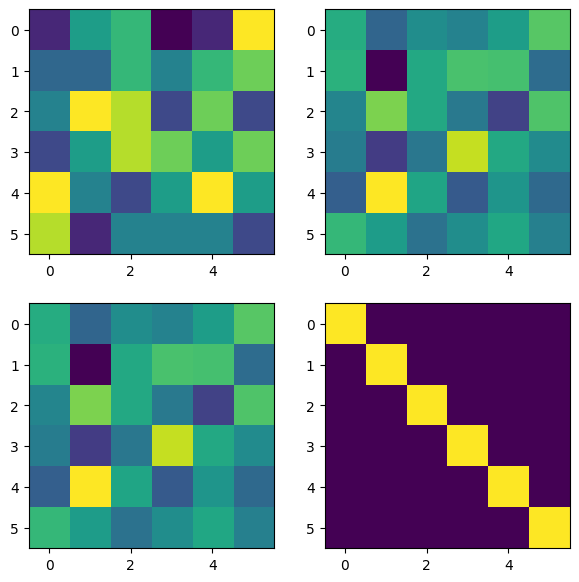

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

ax1.imshow(A)
ax2.imshow(adj(A))
ax3.imshow(invert(A))
ax4.imshow(A @ invert(A))

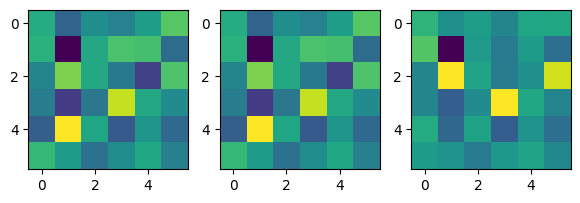

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(invert(A))
ax2.imshow(np.linalg.inv(A))
ax3.imshow(invert(A) - np.linalg.inv(A))

In [12]:
A, invert(A), np.linalg.inv(A)

(array([[1, 5, 6, 0, 1, 9],
        [3, 3, 6, 4, 6, 7],
        [4, 9, 8, 2, 7, 2],
        [2, 5, 8, 7, 5, 7],
        [9, 4, 2, 5, 9, 5],
        [8, 1, 4, 4, 4, 2]]),
 array([[ 0.06544359, -0.10523914, -0.00940124, -0.03650968,  0.02975539,
          0.13663746],
        [ 0.07867835, -0.29481563,  0.05750274,  0.11975173,  0.11573567,
         -0.08817087],
        [-0.02907083,  0.1727364 ,  0.05763965, -0.05932822, -0.18081417,
          0.12828587],
        [-0.05038335, -0.1909456 , -0.06389193,  0.23731289,  0.05659   ,
         -0.01314348],
        [-0.11737861,  0.28824388,  0.04801022, -0.13070464,  0.00985761,
         -0.0958379 ],
        [ 0.09255203,  0.028295  , -0.07466229, -0.00839723,  0.05184374,
         -0.04107338]]),
 array([[ 0.06544359, -0.10523914, -0.00940124, -0.03650968,  0.02975539,
          0.13663746],
        [ 0.07867835, -0.29481563,  0.05750274,  0.11975173,  0.11573567,
         -0.08817087],
        [-0.02907083,  0.1727364 ,  0.05763965, -0.0

In [13]:
# Let's test-2: singular matrix
B = np.random.randint(0, 10, size=(6,5))
B = np.concatenate((B, B[:, [2]]*2), axis=1)
np.round(B @ invert(B)) #> Exception: Passed singular matrix

Exception: Passed singular matrix

### Exercise 8.3

In [14]:
# Let us skip it since we already did the general case

### Exercise 8.4

Create right-inversed matrix

Well, the logic is the same as with the left inverted:

We have the idea that 

$$ (AA^T)(AA^T)^{-1} = I <=> A(A^T(AA^T)^{-1}) = I $$

And if (AA^T) is full-ranked (which **is** the case if A (long matrix) has the full row rank)
Than we just have to find the 
$$ A^T(AA^T)^{-1} $$

In [15]:
# Let's proceed

def right_invert(X):
    if np.linalg.matrix_rank(X) < X.shape[0]:
        raise Exception('Passed singular matrix')
    return X.T @ np.linalg.inv(X @ X.T)

In [16]:
# test:

A = np.random.randint(0, 10, size=(5,10))

In [17]:
np.round(A @ right_invert(A))

array([[ 1., -0.,  0., -0.,  0.],
       [ 0.,  1.,  0.,  0., -0.],
       [ 0., -0.,  1., -0., -0.],
       [ 0., -0.,  0.,  1., -0.],
       [ 0., -0.,  0., -0.,  1.]])

In [18]:
right_invert(A)

array([[ 0.04351747, -0.08154113,  0.01687524,  0.05309788, -0.0759919 ],
       [ 0.03391247,  0.02742042, -0.00313641, -0.01028063, -0.01936252],
       [-0.05451902,  0.06883285, -0.08927192,  0.04394251,  0.07055646],
       [ 0.02342356, -0.09340029,  0.06121043,  0.03657949, -0.04453467],
       [ 0.01722163, -0.00227371, -0.00577601,  0.00913582, -0.00922384],
       [-0.08637195,  0.04625491, -0.00222719,  0.03613829,  0.04389964],
       [-0.13185819,  0.13168753, -0.03492491, -0.0114786 ,  0.14310874],
       [ 0.06201041, -0.0108433 , -0.06912109, -0.00972244,  0.05147028],
       [ 0.06812905, -0.00710533,  0.09200217, -0.05178292, -0.08957398],
       [ 0.00701355, -0.0153025 ,  0.03983365, -0.02287881,  0.02160347]])

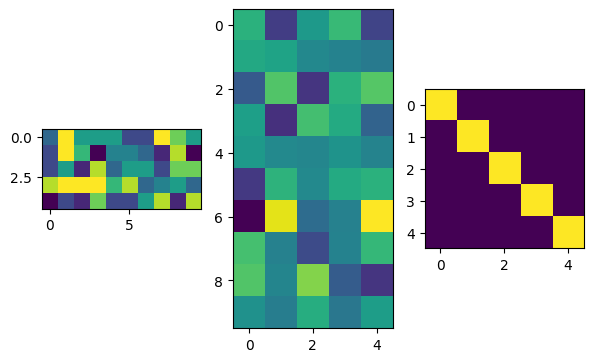

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(A)
ax2.imshow(right_invert(A))
ax3.imshow(A @ right_invert(A))

### Exercise 8.5

Illustrate that:

i) Pseudoinversed matrix equals inversed martix for full-ranked matrices

ii) pseudoinversed matrix equals left-inversd and right-inversed matrices where they exist

In [20]:
A = np.random.randint(0,10, size=(5,5))
frobenius_distance(np.linalg.inv(A), np.linalg.pinv(A))

1.664262864846119e-15

In [21]:
A = np.random.randint(0, 10, size=(5,10))

In [22]:
frobenius_distance(right_invert(A), np.linalg.pinv(A))

3.4936214151606743e-16

In [23]:
def left_invert(X):
    if np.linalg.matrix_rank(X) < X.shape[1]:
        raise Exception('Passed singular matrix')
    return np.linalg.inv(X.T @ X) @ X.T

In [24]:
A = np.random.randint(0, 10, size=(10,5))
frobenius_distance(left_invert(A), np.linalg.pinv(A))

2.1998502156166996e-16

### Exercise 8.6

Illusrate relationship between

$$ (AB)^{-1}, A^{-1}B^{-1}, B^{-1}A^{-1} $$

In [31]:
A = np.random.randint(0, 10, size=(5,5))
B = np.random.randint(0, 10, size=(5,5))

In [34]:
X = np.linalg.inv(A @ B)
Y = np.linalg.inv(A) @ np.linalg.inv(B)
Z = np.linalg.inv(B) @ np.linalg.inv(A)

In [35]:
np.linalg.matrix_rank(A), np.linalg.matrix_rank(B)

(5, 5)

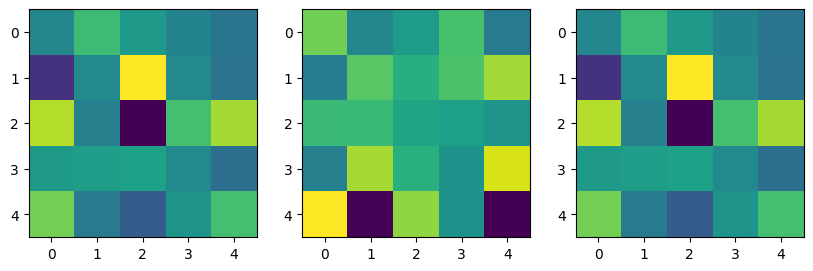

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(X)
ax2.imshow(Y)
ax3.imshow(Z)

In [39]:
print( f'distance between (AB)^-1, A^-1*B^-1 is {frobenius_distance(X,Y)}')
print( f'distance between (AB)^-1, A^-1*B^-1 is {frobenius_distance(X,Z)}')

distance between (AB)^-1, A^-1*B^-1 is 0.5976743972003901
distance between (AB)^-1, A^-1*B^-1 is 5.981144731007942e-16


### Exercise 8.9

Hilbert matrix

In [65]:
def hilbert(i,j):
    return 1 / np.array([[x + y + 1 for x in range(j)] for y in range(i)])

In [66]:
H = hilbert(10,10)
G = np.linalg.inv(H)

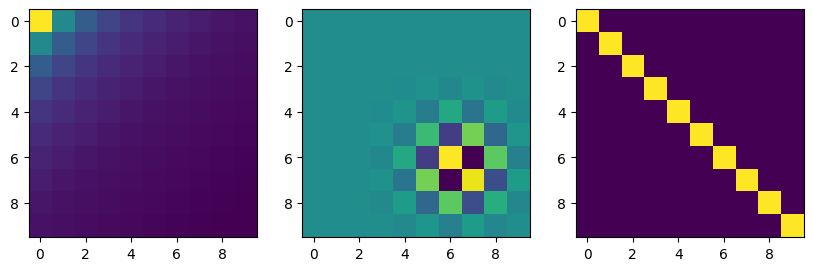

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(H)
ax2.imshow(G)
ax3.imshow(H @ G)

### Exercise 8.10

Hilbert matrix

In [81]:
fd=[]

for i in range(3,12):
    H = hilbert(i, i)
    R = np.random.randn(i,i)
    G = np.linalg.inv(H)
    S = np.linalg.inv(R)
    fd.append([math.log(frobenius_distance(H@G, np.eye(i)), 10), math.log(frobenius_distance(R@S, np.eye(i)), 10)])
fd = np.array(fd)   

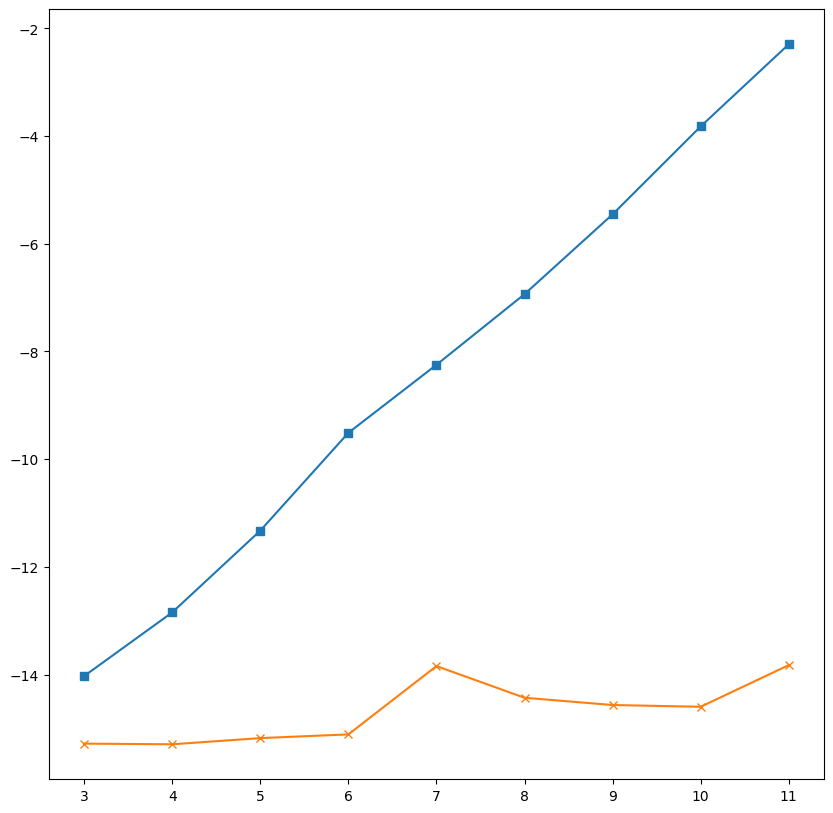

In [84]:
plt.plot(np.arange(3,12), fd[:, 0], 's-')
plt.plot(np.arange(3,12), fd[:, 1], 'x-')